# Étude de l'erreur due à la diffusion et à la convection dans le cas du SWARM

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), '..'))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main import *
from src.plot_fields import *

%matplotlib notebook
rc('figure', figsize=(10,5))
rc('figure', dpi=100)

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
Delta = 10.
lda_1 = 1.
lda_2 = 100.
rho_cp_1 = 1.
rho_cp_2 = 100.

markers = np.array([[0.402647 * Delta, 0.6135421 * Delta]])
alpha = (markers[0,1] - markers[0,0])/Delta
phy_prop = PhysicalProperties(Delta=Delta, lda1=lda_1, lda2=lda_2, rho_cp1=rho_cp_1, rho_cp2=rho_cp_2, alpha=alpha, v=1., diff=1.)
num_prop_euler = NumericalProperties(dx = 0.1, cfl=0.5, fo=1., schema='weno', phy_prop=phy_prop, time_scheme='euler')
num_prop_rk4 = NumericalProperties(dx = 0.1, cfl=0.5, fo=1., schema='weno', phy_prop=phy_prop, time_scheme='rk4')
markers = Bulles(markers=markers, Delta=Delta)
dt = 1.
t_fin = 1.
Formulation = [Problem, ProblemConserv2]

## Étude selon la formulation de l'équation

En fait s'il n'y a pas de convection il n'y a pas de différence entre les différentes formes, à l'exception de la moyenne utilisée pour $\frac{1}{\rho C_p}$

<IPython.core.display.Javascript object>


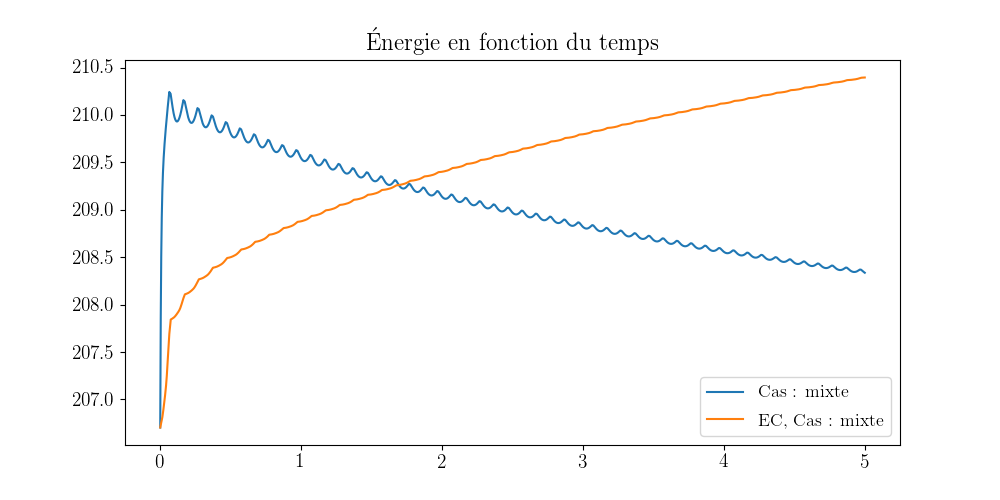

<IPython.core.display.Javascript object>


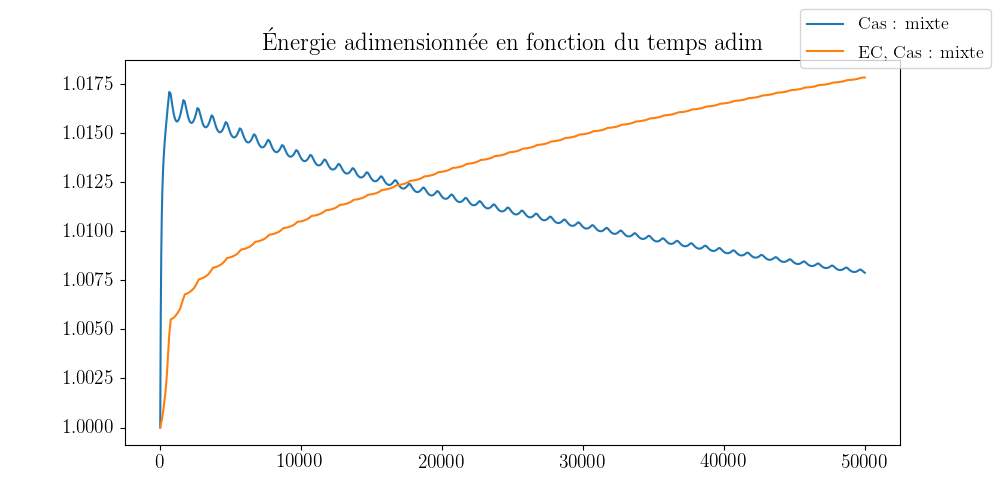

dt fourier
0.00010000000000000002


<IPython.core.display.Javascript object>


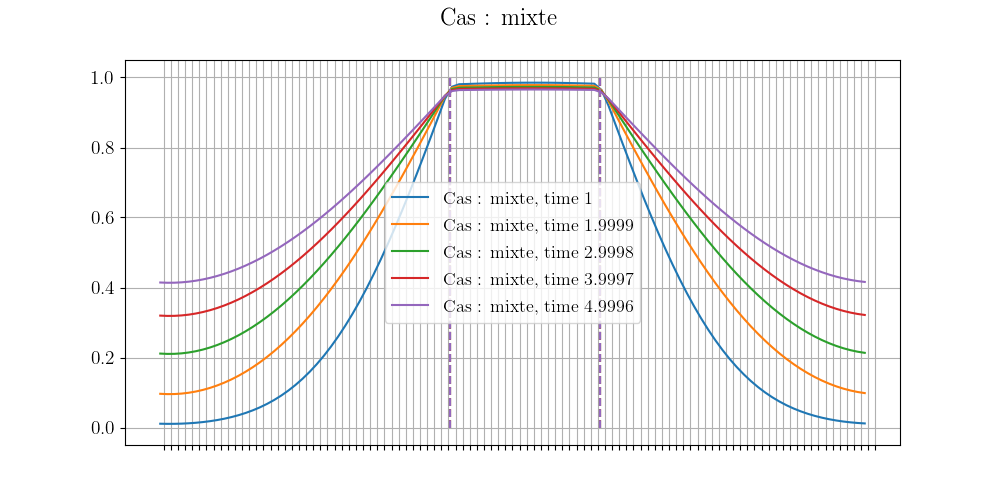

Cas : mixte dE*/dt* = -0.000000
dt fourier
0.00010000000000000002


<IPython.core.display.Javascript object>


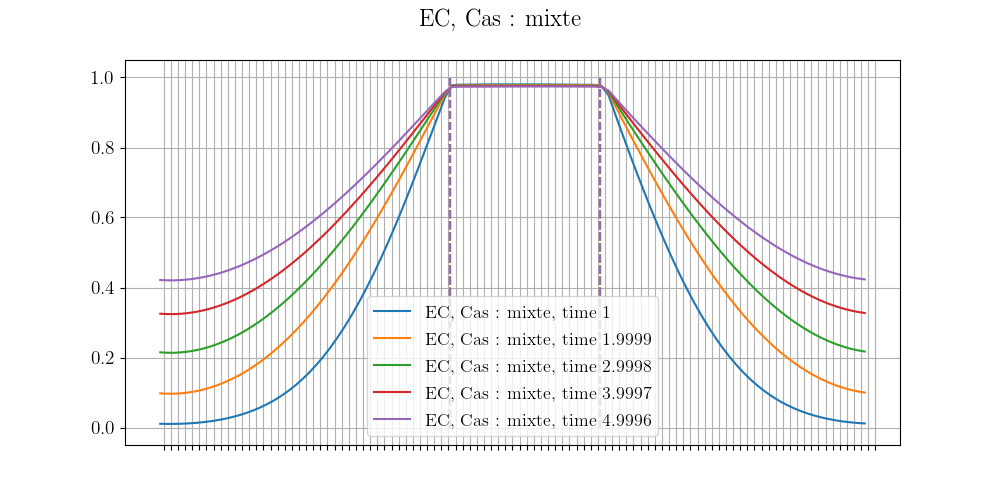

EC, Cas : mixte dE*/dt* = 0.000000


In [4]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    prob = form(get_T_creneau, phy_prop=phy_prop, num_prop=num_prop_euler, markers=markers)
    E0 = prob.energy
    t, e = prob.timestep(n=50000, number_of_plots=5, plotter=Plotter('decale'))
    l = ax1.plot(t, e, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()

<IPython.core.display.Javascript object>


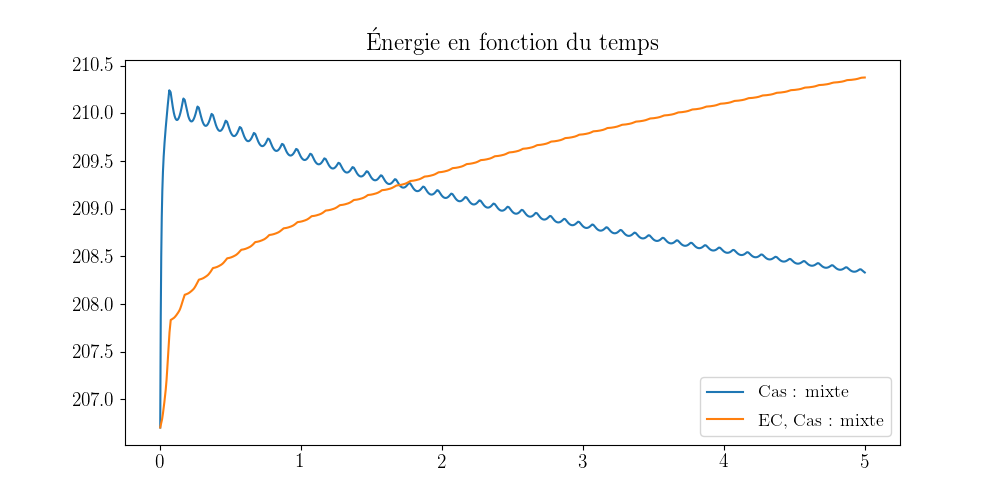

<IPython.core.display.Javascript object>


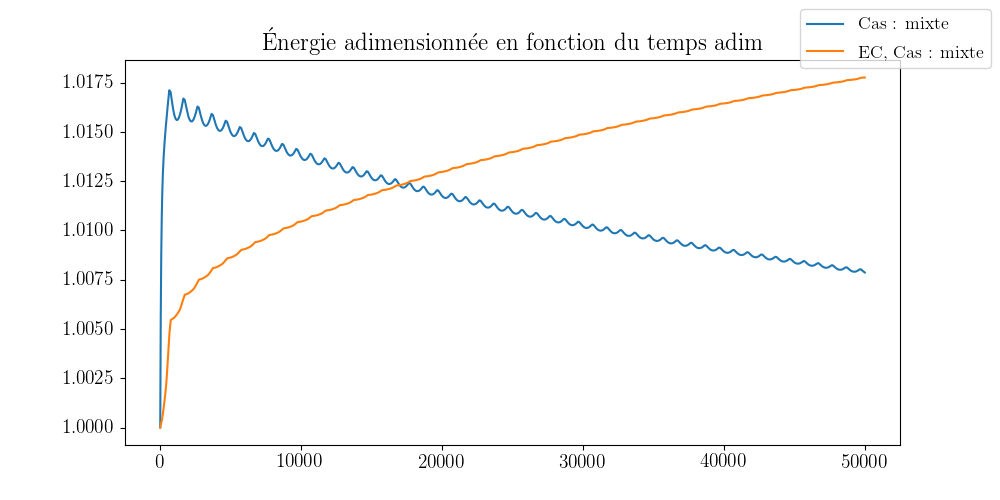

dt fourier
0.00010000000000000002


<IPython.core.display.Javascript object>


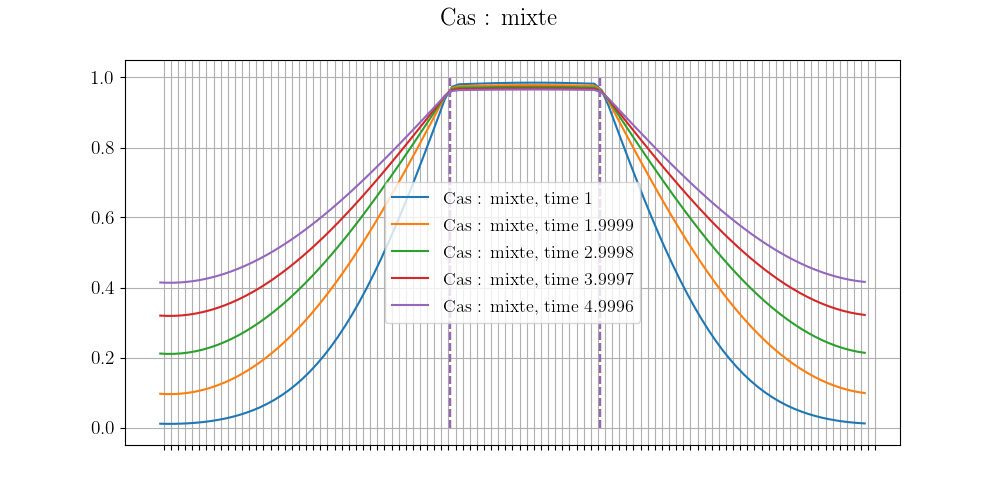

Cas : mixte dE*/dt* = -0.000000
dt fourier
0.00010000000000000002


<IPython.core.display.Javascript object>


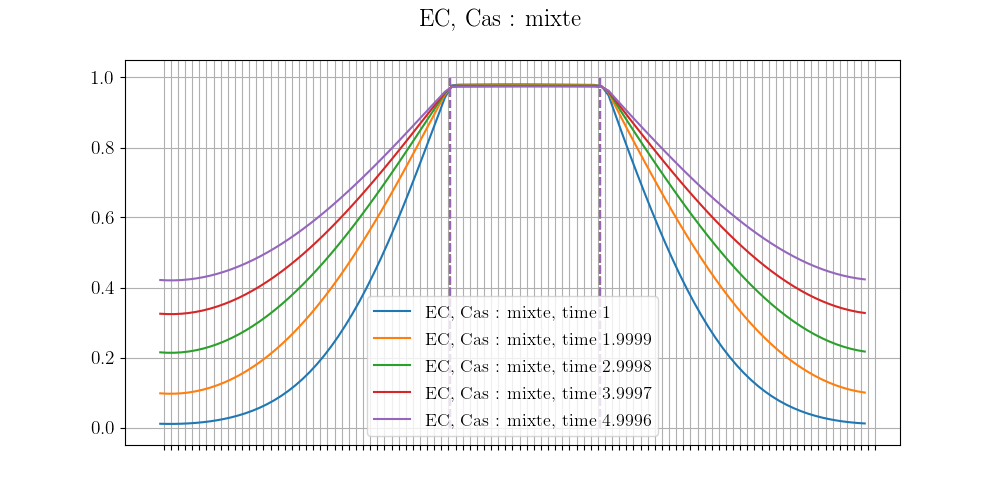

EC, Cas : mixte dE*/dt* = 0.000000


In [5]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    prob = form(get_T_creneau, markers=markers, num_prop=num_prop_rk4, phy_prop=phy_prop)
    E0 = prob.energy
    t, e = prob.timestep(n=50000, number_of_plots=5, plotter=Plotter('decale'))
    l = ax1.plot(t, e, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()